# PGDMLAI - Capstone Week 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 99)

In [4]:
df18 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions19")

# Steps
- Understand what one row of data represents: Financial Advisor
- Understand what the columns represent: Activity Based features
- Look at the data types: All floats, except for `CONTACT_ID` and `refresh_date`
- Check for missing values: replace with zeros
- Check target variable: look at its distribution
- Check the feature distributions and correlations

In [29]:
COLUMNS_TO_DROP = ["CONTACT_ID", "refresh_date"]

In [6]:
df18.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1758.70,NaN,NaN,NaN,NaN,NaN,0.00,1758.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,57943.00,5459.0,52484.0,NaN,NaN,1.0,0.00,0.00,57943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8573.59,NaN,NaN,NaN,NaN,NaN,-8573.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31


In [7]:
df18.shape

(10005, 38)

In [8]:
df18.dtypes

CONTACT_ID                                     object
no_of_sales_12M_1                             float64
no_of_Redemption_12M_1                        float64
no_of_sales_12M_10K                           float64
no_of_Redemption_12M_10K                      float64
no_of_funds_sold_12M_1                        float64
no_of_funds_redeemed_12M_1                    float64
no_of_fund_sales_12M_10K                      float64
no_of_funds_Redemption_12M_10K                float64
no_of_assetclass_sold_12M_1                   float64
no_of_assetclass_redeemed_12M_1               float64
no_of_assetclass_sales_12M_10K                float64
no_of_assetclass_Redemption_12M_10K           float64
No_of_fund_curr                               float64
No_of_asset_curr                              float64
AUM                                           float64
sales_curr                                    float64
sales_12M                                     float64
redemption_curr             

In [9]:
df18['AUM'].describe()

count    9.420000e+03
mean     3.617280e+05
std      3.344579e+06
min     -7.713610e+07
25%     -3.560694e+04
50%      2.139880e+03
75%      1.747293e+05
max      2.232411e+08
Name: AUM, dtype: float64

### Check for missing values

- Fill `NaN` with `0` because they represent no activity.

### Investigate target variable

In [11]:
df18.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

<AxesSubplot:>

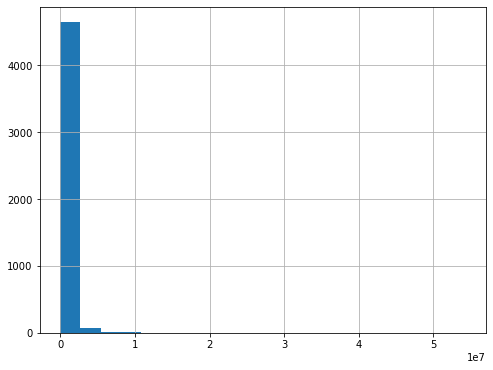

In [14]:
df18['sales_12M'].hist(figsize=(8,6), bins=20)

In [15]:
df18['sales_12M'].describe()

count    4.768000e+03
mean     3.632014e+05
std      1.615194e+06
min     -3.518727e+04
25%      5.731465e+03
50%      3.751729e+04
75%      2.043533e+05
max      5.434650e+07
Name: sales_12M, dtype: float64

### Investigate features

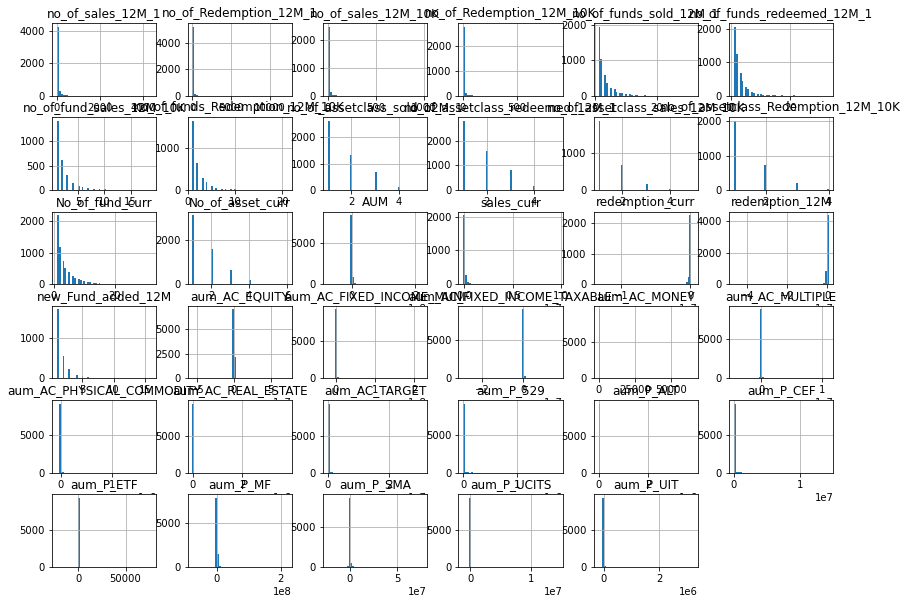

In [26]:
df18.drop(columns='sales_12M').hist(figsize=(14,10), bins=50);

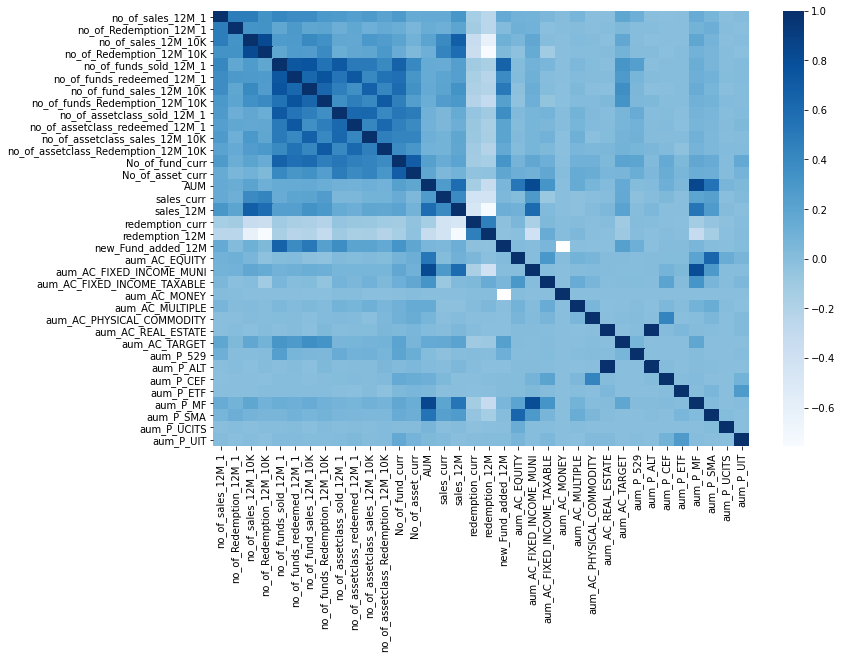

In [25]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.heatmap(df18.corr(),axes=axes, cmap="Blues");

# Get first baseline model

In [33]:
from sklearn.model_selection import train_test_split

In [39]:
df18.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

In [40]:
def combine_curr_and_12M(df):
    df['sales_12M_inclusive'] = df['sales_curr'] + df['sales_12M']
    df = df.drop(columns=['sales_curr', 'sales_12M'])
    return df

In [41]:
df18_targ = combine_curr_and_12M(df18) 

In [42]:
num_cols = [col for col in df18_targ.columns if col not in COLUMNS_TO_DROP]

In [44]:
# seperate target from features
X = df18_targ[num_cols].drop(columns='sales_12M_inclusive')
y = df18_targ['sales_12M_inclusive']

In [45]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Fill NA values in training

In [53]:
def fillna_values(df):
    df = df.fillna(0)
    return df

In [63]:
X_train = fillna_values(X_train)
y_train = fillna_values(y_train)

## Create first model

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [65]:
lr = LinearRegression()
lr.fit(X_train.fillna(0), y_train)

LinearRegression()

In [67]:
cross_validate(lr, X_train, y_train, cv=5)

{'fit_time': array([0.0087471 , 0.00744772, 0.01338482, 0.01070595, 0.00689721]),
 'score_time': array([0.00833511, 0.00631332, 0.00296998, 0.00216103, 0.00541067]),
 'test_score': array([ 0.50424958,  0.57322279,  0.55815952, -0.85296551,  0.36704928])}